# Creating a Customised Line Chart with Matplotlib in Python

In this tutorial, we will walk through the process of creating a customized line chart using Matplotlib in Python. We'll visualize the closing prices of Microsoft stock, highlighting key points like the maximum and minimum prices, and adding various customizations to enhance readability and presentation.

## Prerequisites

Before we begin, ensure you have the required libraries installed. 

In [1]:
import numpy as np
import pandas as pd
import os
from functions import *


import yfinance as yf
import datetime as dt

In [2]:
import matplotlib.pyplot as plt

In [3]:
_start = dt.date(2019,1,1)
_end = dt.date(2024,12,31)
ticker = 'MSFT'
df = yf.download(ticker, start = _start, end = _end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
df

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2019-01-02,94.945526,95.537055,92.898639,93.471392,35329300
2019-01-03,91.452644,94.072285,91.264852,93.987776,42579100
2019-01-04,95.706062,96.250649,92.889245,93.631008,44060600
2019-01-07,95.828102,96.964217,94.814054,95.433749,35656100
2019-01-08,96.522919,97.621475,95.499472,96.748262,31514400
...,...,...,...,...,...
2024-12-23,433.583038,435.973841,431.172293,435.067322,19152500
2024-12-24,437.647400,437.916385,432.527101,432.985331,7164500


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\fd92u\anaconda3\Lib\site-packages\matplotlib\text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
C:\Users\fd92u\anaconda3\Lib\site-packages\matplotlib\text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
C:\Users\fd92u\anaconda3\Lib\site-packages\matplotlib\text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


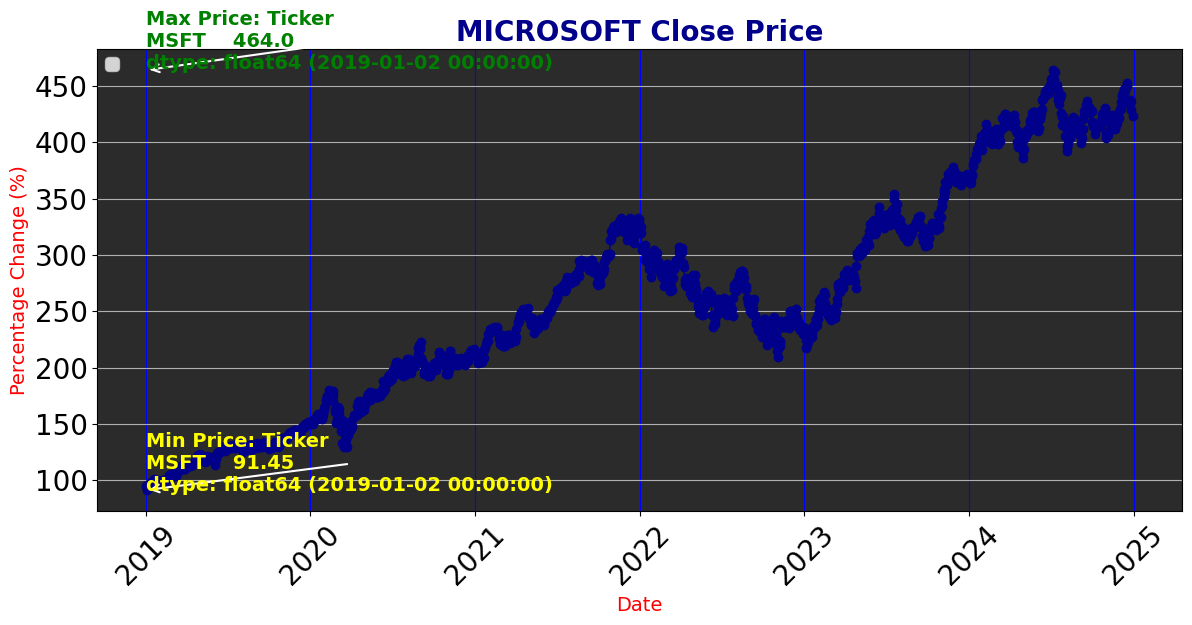

In [12]:
#Plot the series

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], marker='o', color='darkblue', linestyle='-', linewidth=1)

#df['Close'].plot( color='red', linestyle='-', marker='o', linewidth=1, markersize=1)

# Set background color for the plot area
plt.gca().set_facecolor('#2b2b2b')  # Dark gray background
#plt.axhline(0, linestyle='--', color='red')


# Add titles and labels with custom fonts and colors:
plt.title('MICROSOFT Close Price', fontsize=20, color='darkblue', weight='bold')
plt.ylabel('Closing Price (USD)', fontsize=14, color='red')
plt.xlabel('Date', fontsize=14, color='red')

# Add legend for better interpretation
plt.legend(fontsize=12, loc='upper left')

# Find the maximum 
max_rate = df['Close'].max()  # Maximum rate

# Get the corresponding years for max and min rates
max_year = df[df['Close'] == max_rate].index[0]  # Year of max rate

max_rate = round(max_rate, 2)  # Round to 2 decimal places

# Annotate the maximum point with both price and year
plt.annotate(f'Max Price: {max_rate} ({max_year})', 
             xy=(max_year, max_rate), 
             xytext=(max_year, max_rate + 1), 
             arrowprops=dict(color='white', arrowstyle="->", lw=1.5),
             fontsize=14, color='green', weight='bold')

# Highlight minimum value
min_rate = df['Close'].min()  # Minimum rate
min_year = df[df['Close'] == min_rate].index[0]  # Year of min price
min_rate = round(min_rate, 2)  # Round to 2 decimal places

plt.annotate(f'Min Price: {min_rate} ({min_year})', 
             xy=(min_year, min_rate), 
             xytext=(min_year, min_rate - 1), 
             arrowprops=dict(color='white', arrowstyle="->", lw=1.5),
             fontsize=14, color='yellow', weight='bold')

# Rotate x-ticks for better readability and adjust font size
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)


plt.ylabel('Percentage Change (%)')
plt.xlabel('Date')


# Add gridlines to make the chart easier to read:
plt.grid(axis='x', color='blue') 
plt.grid(axis='y') 


# Exporting the chart as an image file
plt.savefig('linechart.png')




plt.show()


This tutorial demonstrated how to create a fully customized line chart using Matplotlib in Python. We covered adding annotations, customizing colors, and enhancing readability. With these techniques, you can create visually appealing plots to analyze and present your data effectively.

In [ ]:
import subprocess
import os



def run_command(command):
    """Run a shell command and handle errors."""
    try:
        result = subprocess.run(command, shell=True, check=True, capture_output=True, text=True)
        print(result.stdout)
    except subprocess.CalledProcessError as e:
        print(f"Error: {e.stderr}")
        exit(1)

repo_url = "https://github.com/sisqodataclub/ml-ds.git"  # Change this!
#run_command(f" git clone {repo_url}")
run_command("git fetch origin")
run_command("git reset --hard origin/main")

In [ ]:


# Define the notebook filename and repository
notebook_filename = "Line_Chart.ipynb"

# Git commands to push the Jupyter Notebook
commands = [
    "git init",
    f"git add {notebook_filename}",
    'git commit -m "Added Jupyter Notebook"',
    f"git remote add origin {repo_url}",
    "git branch -M main",
    "git push -u origin main"
]

for command in commands:
    run_command(command)

print("✅ Jupyter Notebook successfully pushed to GitHub!")
